<img src="./img/logo_UTN.svg" align="right" width="300" />

# Trabajo Semanal 4 - Teoría de Circuitos 2
### Autor: Santiago Palozzo
  
<img src="./img/plantilla.png" align="center" width="400" />

# 1. Desarrollo en papel


In [17]:
from IPython.display import IFrame
IFrame("./desarrollo.pdf", width=800, height=800)

# 2. Simulacion numérica en Python

In [10]:
#%% Inicializacion de librerias
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np

# Librería de TC2
import pytc2.sistemas_lineales as tc2

In [16]:
#%% Inicializacion de graficos para el Notebook
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})
#%%  Fin - Inicialización de librerías

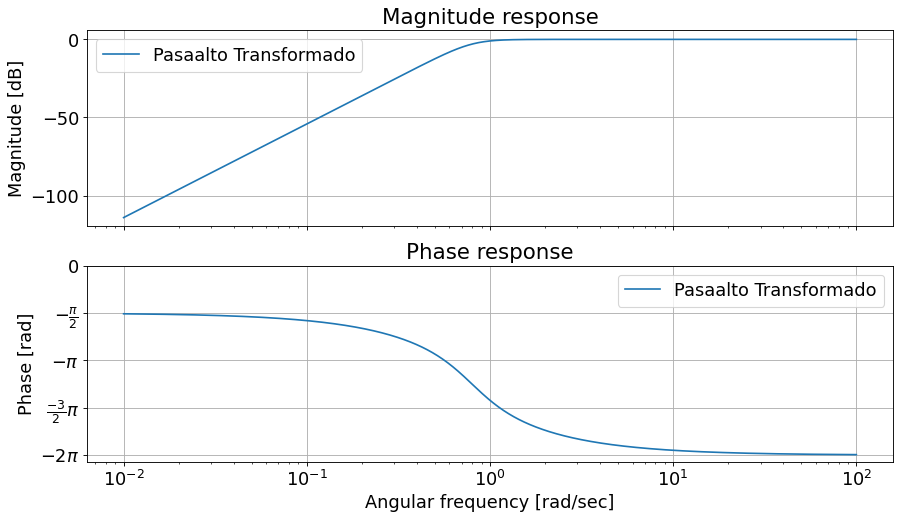

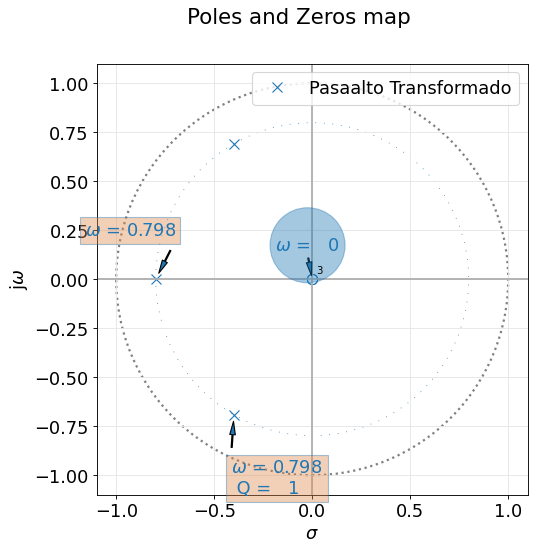

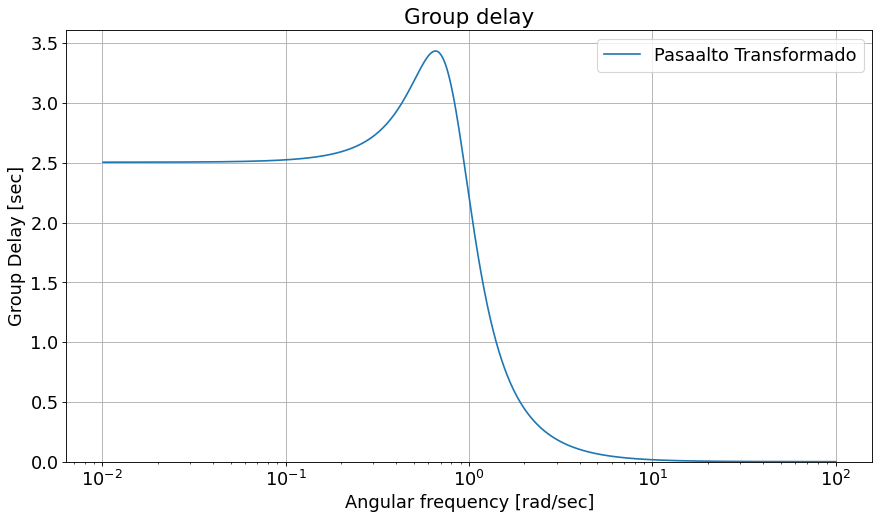

In [12]:
#%% Defino los parametros del filtro
fp= 40 * 10**3 #40 kHz
fs= 10 * 10**3 #10 kHz

wp= 2*np.pi*fp
ws= 2*np.pi*fs

norma_w= wp

wp_n= wp/norma_w # 1 rad/s
ws_n= ws/norma_w # 0.25 rad/s

alfa_min= 30 #dB
alfa_max= 1  #dB

# Realizo la transformacion en frecuencia hacia el prototipo pasabajo

Wp_n= 1/wp_n
Ws_n= 1/ws_n

ee2= 10**(alfa_max/10)-1 #epsilon**2
ee = np.sqrt(ee2)


# Consigo el orden del filtro "n" iterando
n=1
alfa_prueba= 10*np.log10(1+(ee2*np.power(Ws_n, 2*n)))
while alfa_prueba<alfa_min:
    n= n+1
    alfa_prueba= 10*np.log10(1+(ee2*np.power(Ws_n, 2*n)))
    
w_butter= np.power(ee, -1/n)

w0= wp_n * w_butter ## desnormalizo por w_butter
qq= 1

#%% Simulacion del filtro

### Prototipo Pasabajo
num1_lp,den1_lp= [w0],[1, w0] #Primer orden
num2_lp,den2_lp= [w0**2],[1, w0/qq, w0**2] #Segundo orden

my_lp= TransferFunction(np.polymul(num1_lp, num2_lp),np.polymul(den1_lp, den2_lp))

plt.close('all')
#tc2.analyze_sys(my_lp, sys_name="Prototipo Pasabajo")

### Transformacion a Pasaaltoo
num1_hp,den1_hp= [1, 0],[1, 1/w0] #Primer orden
num2_hp,den2_hp= [1, 0, 0],[1, 1/w0/qq, 1/w0**2] #Segundo orden
my_hp= TransferFunction(np.polymul(num1_hp, num2_hp),np.polymul(den1_hp, den2_hp))

#El denominador se mantuvo igual

tc2.analyze_sys(my_hp, sys_name="Pasaalto Transformado")

# 3. Circuito normalizado y simulación en LTspice

Esta implementacion se realizo con elementos pasivos, utilizando un OPAMP unicamente como separador de etapas. Es importante notar que la simulacion se realizo de tal forma que en el eje X de LTspice $1 Hz$ coincide con lo que sería $1 \frac{rad}{s}$

<img src="./img/circuito_pasivo_spice.png" align="center" width="900" />

<img src="./img/simulacion_spice_pasivo.png" align="center" width="1000" />

En el grafico se observa como en $\omega= 1$ decae aproximadamente 1dB, mientras que en $\omega= 0.25$ la atenuacion es de 30 dB, cumpliendo con la restricción de la plantilla. 

# 4. Circuito activado mediante el GIC de Antoniou

Para activar el circuito diseñado previamente se utilizó el GIC de Antoniou (Conversor Generalizado de Impedancias) para reemplazar el inductor del circuito pasivo. El GIC se implementó de tal forma que Z1, Z3, Z4 y Z5 sean resistencias (de igual valor) y Z2 un capacitor. Esto determina una impedancia de entrada $Z_i = s \cdot L_{eq}$ con $L_{eq} = R^2 \cdot C$

- Simulacion en LTspice
 
<img src="./img/circuito_con_gic.png" align="center" width="900" />

<img src="./img/simulacion_spice_gic.png" align="center" width="1000" />

Se puede observar como la simulación se mantuvo sin cambios, por lo que la implementación resultó ser correcta. 